In [1]:
import os #usada para navegar em automações de sistemas operacionais
import pandas as pd
from IPython.display import HTML
import plotly.express as px
import seaborn as sns
import numpy as np

In [3]:
lista_planilhas = os.listdir(f'...Arquivos') # Uma pasta do meu notebook com vários arquivos .csv
print(lista_planilhas)
display(lista_planilhas)

['Devolucoes+-+Belo+Horizonte.csv', 'Devolucoes+-+Curitiba.csv', 'Devolucoes+-+Fortaleza.csv', 'Devolucoes+-+Goiás.csv', 'Devolucoes+-+Porto+Alegre.csv', 'Devolucoes+-+Recife.csv', 'Devolucoes+-+Rio+de+Janeiro.csv', 'Devolucoes+-+Salvador.csv', 'Devolucoes+-+São+Paulo.csv', 'Vendas+-+Belo+Horizonte.csv', 'Vendas+-+Curitiba.csv', 'Vendas+-+Fortaleza.csv', 'Vendas+-+Goiás.csv', 'Vendas+-+Porto+Alegre.csv', 'Vendas+-+Recife.csv', 'Vendas+-+Rio+de+Janeiro.csv', 'Vendas+-+Salvador.csv', 'Vendas+-+São+Paulo.csv']


['Devolucoes+-+Belo+Horizonte.csv',
 'Devolucoes+-+Curitiba.csv',
 'Devolucoes+-+Fortaleza.csv',
 'Devolucoes+-+Goiás.csv',
 'Devolucoes+-+Porto+Alegre.csv',
 'Devolucoes+-+Recife.csv',
 'Devolucoes+-+Rio+de+Janeiro.csv',
 'Devolucoes+-+Salvador.csv',
 'Devolucoes+-+São+Paulo.csv',
 'Vendas+-+Belo+Horizonte.csv',
 'Vendas+-+Curitiba.csv',
 'Vendas+-+Fortaleza.csv',
 'Vendas+-+Goiás.csv',
 'Vendas+-+Porto+Alegre.csv',
 'Vendas+-+Recife.csv',
 'Vendas+-+Rio+de+Janeiro.csv',
 'Vendas+-+Salvador.csv',
 'Vendas+-+São+Paulo.csv']

In [4]:
total_vendas = pd.DataFrame()
for planilha in lista_planilhas:
    if "Vendas" in planilha:
        # print(f'E:\\python\\nv\\python_basico.py\\CURSO_DS_2\\PROJETO2\\Arquivos\\{planilha}')
        tabela = pd.read_csv(f'...Arquivos\\{planilha}')
        total_vendas = pd.concat([total_vendas, tabela])
total_vendas

,Unnamed: 0,SKU,Produto,Quantidade,Primeiro Nome,Sobrenome,Data,Loja,Valor Unitário,Unnamed: 8
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2023,Belo Horizonte,2500,NaN
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2023,Belo Horizonte,2500,NaN
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2023,Belo Horizonte,5300,NaN
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2023,Belo Horizonte,5300,NaN
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2023,Belo Horizonte,3500,NaN
...,...,...,...,...,...,...,...,...,...,...
2221,9981,HL7348,SmartWatch,4,Joío,Junior,4/14/2023,São Paulo,1400,NaN
2222,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2023,São Paulo,5300,NaN
2223,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2023,São Paulo,5300,NaN
2224,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2023,São Paulo,1400,NaN


In [5]:
total_devolucoes = pd.DataFrame()
for planilha in lista_planilhas:
    if "Devolucoes" in planilha:
        # print(f'E:\\python\\nv\\python_basico.py\\CURSO_DS_2\\PROJETO2\\Arquivos\\{planilha}')
        tabela = pd.read_csv(f'...Arquivos\\{planilha}')
        total_devolucoes = pd.concat([total_devolucoes, tabela])
display(total_devolucoes)

,Unnamed: 0,SKU,Produto,Quantidade,Data,Loja,Valor Unitário,Unnamed: 6
0,3,HL1918,iPhone,3,10/31/2023,Belo Horizonte,5300,NaN
1,6,HL7348,SmartWatch,1,2/6/2023,Belo Horizonte,1400,NaN
2,20,HL7348,SmartWatch,3,10/5/2023,Belo Horizonte,1400,NaN
3,21,HL9962,Android,1,5/26/2023,Belo Horizonte,3400,NaN
4,23,HL2714,Tablet,1,4/24/2023,Belo Horizonte,1600,NaN
...,...,...,...,...,...,...,...,...
97,477,HL4379,Televisão,5,4/5/2023,São Paulo,2500,NaN
98,478,HL8851,Notebook,1,10/27/2023,São Paulo,3500,NaN
99,486,HL7348,SmartWatch,5,4/13/2023,São Paulo,1400,NaN
100,487,HL2714,Tablet,2,9/7/2023,São Paulo,1600,NaN


In [6]:
# INDICADOR 1: 3 produtos e 3 lojas que geram mais vendas
quantidade_produto_v1 = total_vendas[['SKU', 'Produto', 'Quantidade']].groupby(['SKU', 'Produto']).sum().sort_values(by='Quantidade', ascending=False)
quantidade_loja = total_vendas[['Loja', 'Quantidade']].groupby('Loja').sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de vendas líquidas por produto:</h2>'))
display(quantidade_produto_v1.head(3))

# br pula linha
# hr coloca linha horizontal
display(HTML('<br /><hr /><br />'))

display(HTML('<h2>Quantidade de vendas líquidas por loja:</h2>'))
display(quantidade_loja.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,8974
HL4379,Televisão,5931
HL8851,Notebook,3249


,Quantidade
Loja,
São Paulo,6674
Rio de Janeiro,4393
Fortaleza,4320


In [7]:
# Gráfico de pizza
grafico1 = px.pie(quantidade_produto_v1.reset_index(), names='Produto', values='Quantidade', title='Quantidade de vendas líquidas por produto')
grafico1.update_traces(textposition='inside', textinfo='label+percent')
grafico1.show()

# Supondo que grafico1 seja o nome do objeto que contém o gráfico

grafico1.write_image("grafico2.png")

#pio.write_html(grafico1, 'grafico.html', auto_open=True)

# Gráfico de barra
grafico2 = px.bar(quantidade_loja.reset_index(), x='Loja', y='Quantidade', title='Quantidade de vendas líquidas por loja', color='Quantidade')
grafico2.show()

In [8]:
quantidade_produto_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes]).groupby(['SKU', 'Produto'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)
quantidade_loja_vb = pd.DataFrame(pd.concat([total_vendas, total_devolucoes]).groupby(['Loja'])['Quantidade'].sum()).sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de vendas brutas dos 3 principais produtos:</h2>'))
display(quantidade_produto_vb.head(3))

display(HTML('<br /><hr /><br />'))

display(HTML('<h2>Quantidade de vendas brutas das 3 principais lojas:</h2>'))
display(quantidade_loja_vb.head(3))

,,Quantidade
SKU,Produto,
HL1918,iPhone,9144
HL4379,Televisão,6078
HL8851,Notebook,3423


,Quantidade
Loja,
São Paulo,6974
Rio de Janeiro,4614
Fortaleza,4591


In [9]:

grafico3 = px.bar(
    quantidade_produto_vb.reset_index(),
    x='Produto',
    y='Quantidade',
    title='Quantidade de vendas brutas por produto',
    color='Produto'
)

grafico3.update_xaxes(categoryorder='total descending') # Ordenar as colunas
grafico3.update_layout(
    # plot_bgcolor='black',
    # paper_bgcolor='blue',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font_color='white'
)
#Color.adobe.com traz cores em vários tipos de escalas
# RGB permite transparência nas cores, diferente da escala hexadecimal
grafico3.show()

grafico4 = px.bar(
    quantidade_loja_vb.reset_index(),
    x='Loja',
    y='Quantidade',
    title='Quantidade de vendas brutas por loja',
    color='Loja'
)
grafico4.update_layout(
    xaxis={
        'tickfont':{
            'color':'blue',
            'size': 14
        },
        'title':{
          #  'text': 'Eixo x',
            'font':{
                'color': 'orange',
                'size': 18
            }
        }
    },
    yaxis={
        'tickfont':{
            'color':'red',
            'size': 14
        },
        'title':{
          #  'text': 'Eixo y', # Sem isso, fica a informação padrão da tabela
            'font':{
                'color': 'violet',
                'size': 18
            }
        }
    }
)
grafico4.show()

In [10]:
quantidade_produto_d = total_devolucoes[['Produto', 'Quantidade']].groupby(['Produto']).sum().sort_values(by='Quantidade', ascending=False)
quantidade_loja_d = total_devolucoes[['Loja', 'Quantidade']].groupby('Loja').sum().sort_values(by='Quantidade', ascending=False)

display(HTML('<h2>Quantidade de devoluções dos 3 principais produtos:</h2>'))
display(quantidade_produto_d.head(3))

display(HTML('<br /><hr /><br />'))

display(HTML('<h2>Quantidade de vendas brutas das 3 principais lojas:</h2>'))
display(quantidade_loja_d.head(3))

,Quantidade
Produto,
SmartWatch,395
Tablet,301
Android,187


,Quantidade
Loja,
São Paulo,300
Fortaleza,271
Rio de Janeiro,221


,Categoria,Quantidade,Tipo
SmartWatch,SmartWatch,395,Produto
Tablet,Tablet,301,Produto
Android,Android,187,Produto
Notebook,Notebook,174,Produto
iPhone,iPhone,170,Produto
Televisão,Televisão,147,Produto
Câmera,Câmera,143,Produto
São Paulo,São Paulo,300,Loja
Fortaleza,Fortaleza,271,Loja
Rio de Janeiro,Rio de Janeiro,221,Loja


Text(0, 0.5, 'Rótulo Eixo Y')

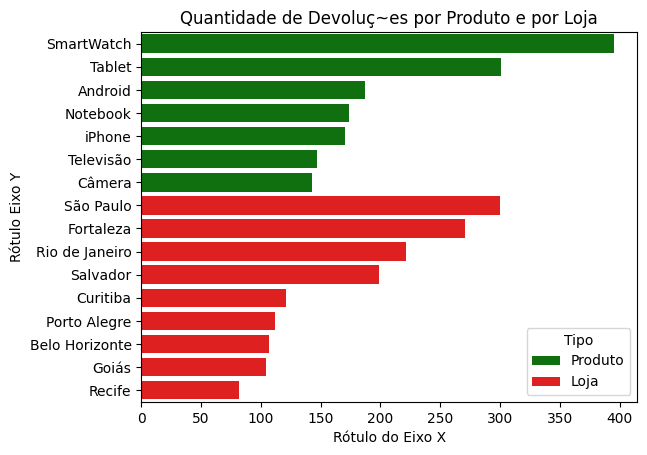

In [11]:
# Criar DF para gráfico com base nos DF originais
quantidade_produto_d_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_produto_d.index,
        'Quantidade': quantidade_produto_d['Quantidade'],
        'Tipo': ['Produto'] * len(quantidade_produto_d)
    }
)

quantidade_loja_d_grafico = pd.DataFrame(
    {
        'Categoria': quantidade_loja_d.index,
        'Quantidade': quantidade_loja_d['Quantidade'],
        'Tipo': ['Loja'] * len(quantidade_loja_d)
    }
)
df_concatenado = pd.concat([quantidade_produto_d_grafico, quantidade_loja_d_grafico])
# display(quantidade_produto_d_grafico)
# display(quantidade_loja_d_grafico)

display(df_concatenado)

# Plotar o gráfico de barras horizontais
cores={'Produto': 'green', 'Loja': 'red'} # As cores podem ser hexa, rgba...
grafico5 = sns.barplot(data=df_concatenado, x='Quantidade', y='Categoria', hue='Tipo', orient='h', palette=cores)
grafico5.set_title('Quantidade de Devoluç~es por Produto e por Loja')
grafico5.set_xlabel('Rótulo do Eixo X')
grafico5.set_ylabel('Rótulo Eixo Y')

In [12]:
# Calcular a variação das vendas ds produtos por mês
data_formatada = pd.to_datetime(total_vendas['Data'], format='%m/%d/%Y')
vendas_mensais = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade']
    }
)
# resample serve para fazer agrupamentos dos meses. Função para trabalhar com datas
vendas_mensais = vendas_mensais.set_index('Data').resample('ME').sum()
vendas_mensais.index = vendas_mensais.index.strftime('%b/%Y')

vendas_mensais['Variacao'] = vendas_mensais['Quantidade'].diff()

display(HTML('<h2>Variação da quantidade dos produtos vendidos por mês</h2>'))
display(vendas_mensais)

,Quantidade,Variacao
Data,,
Jan/2023,2553,NaN
Feb/2023,2508,-45.0
Mar/2023,2538,30.0
Apr/2023,2366,-172.0
May/2023,2357,-9.0
Jun/2023,2584,227.0
Jul/2023,2666,82.0
Aug/2023,2400,-266.0
Sep/2023,2446,46.0


In [13]:
# np.where é utilizado para atribuir valores condicionais
# Gráfico de linha
text_color = np.where(vendas_mensais['Variacao'] < 0, 'red', 'blue')
grafico6 = px.line(vendas_mensais.reset_index(), x='Data', y='Quantidade', title='Vendas Mensais x Sazonalidades', markers=True, text=vendas_mensais['Quantidade'])
grafico6.update_traces(textposition='top center', textfont=dict(color=text_color, size=15), marker=dict(color=text_color))

grafico6.show()

In [14]:
# Calculando faturamento trimestral do ano

faturamento_trimestral = pd.DataFrame(
    {
        'Data': data_formatada,
        'Quantidade': total_vendas['Quantidade'],
        'Valor Unitário': total_vendas['Valor Unitário'],
        'Faturamento': total_vendas['Quantidade'] * total_vendas['Valor Unitário']
    }

)

# Descobre informações da data, como a semana que ela pertence ou o semestre. Mais info é só pesquisar no Google
faturamento_trimestral['Trimestre'] = faturamento_trimestral['Data'].dt.to_period('Q')

faturamento_trimestral = pd.DataFrame(faturamento_trimestral.groupby('Trimestre')['Faturamento'].sum())

display(HTML('<h2>Faturamento trimestral:</h2>'))
display(faturamento_trimestral)

,Faturamento
Trimestre,
2023Q1,25038900
2023Q2,24163700
2023Q3,24970600
2023Q4,25146300


In [15]:
# Gráfico de Área
faturamento_trimestral.index = faturamento_trimestral.index.astype(str)

text_color = np.where(faturamento_trimestral['Faturamento'].diff() < 0, 'red', 'blue')

grafico7 = px.area(
    faturamento_trimestral.reset_index(), 
    x='Trimestre', 
    y='Faturamento', 
    title='Faturamento Trimestral', 
    markers=True)

grafico7.update_layout(
    xaxis_title='Título Eixo X',
    yaxis_title='Título Eixo Y',
    margin=dict(t=50, l=300, r=300, b=50),
    title=dict(x=0.5)
)
grafico7.update_traces(
    fillcolor='rgba(27, 239, 143, 0.2)',
    line_color='rgba(27, 239, 1143, 1)',
    marker=dict(color=text_color)
)
grafico7.show()

